# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.net)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
<a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 

## Tutorial 28: Hierarchical Clustering and Networks

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  25 of 25 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4057%,0.4035%,1.9693%,0.0180%,0.9305%,0.3678%,0.5783%,0.9483%,-1.1954%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1730%,0.2410%,1.3734%,-1.0857%
2016-01-06,-11.4863%,-1.5879%,0.2412%,-1.7557%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5646%,0.3108%,-1.0155%,-0.7653%,-3.0048%,-0.9034%,-2.9145%
2016-01-07,-5.1389%,-4.1922%,-1.6574%,-2.7699%,-1.1047%,-1.9769%,-1.2207%,-0.8856%,-4.6058%,-2.5394%,...,-2.2066%,-3.0310%,-1.0410%,-3.1557%,-1.6148%,-0.2700%,-2.2845%,-2.0570%,-0.5492%,-3.0020%
2016-01-08,0.2736%,-2.2705%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5707%,-1.6402%,-1.7642%,-0.1649%,...,-0.1539%,-1.1366%,-0.7308%,-0.1448%,0.0895%,-3.3839%,-0.1117%,-1.1387%,-0.9719%,-1.1254%
2016-01-11,-4.3383%,0.1692%,-1.6851%,-1.0215%,0.0915%,-1.1791%,0.5674%,0.5287%,0.6616%,0.0330%,...,1.6436%,0.0000%,0.9869%,-0.1450%,1.2224%,1.4570%,0.5367%,-0.4607%,0.5800%,-1.9919%


## 2. Comparing Linkage Methods using Dendrograms

[]

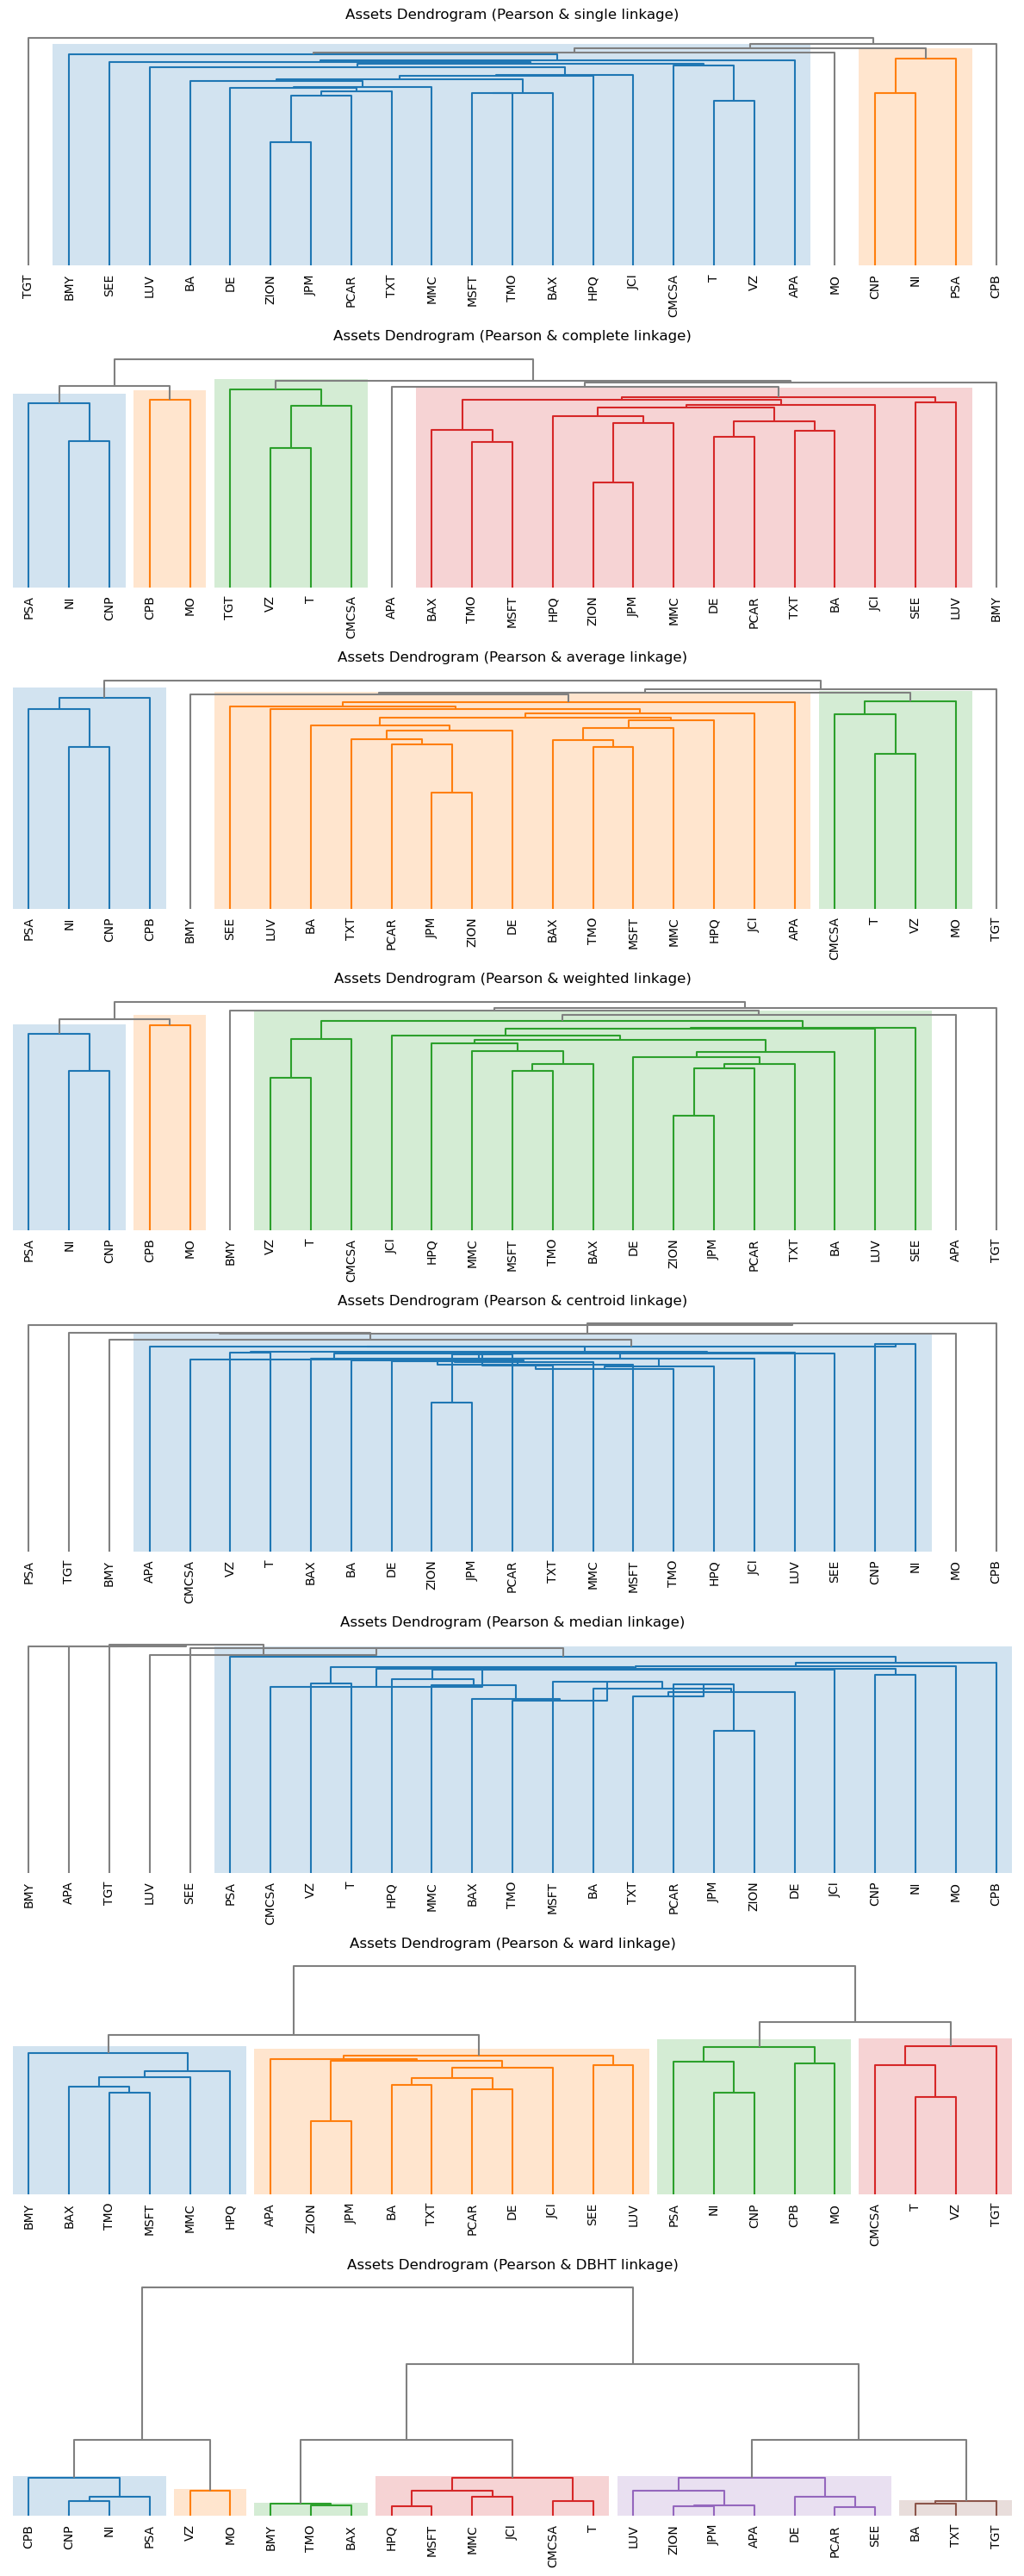

In [3]:
import matplotlib.pyplot as plt
import riskfolio as rp

# Comparison of several linkages methods

linkages = ['single','complete','average','weighted',
            'centroid', 'median', 'ward','DBHT']

fig, ax = plt.subplots(len(linkages), 1, figsize=(12, 30))
ax = np.ravel(ax)

j = 0
for i in linkages:
    ax[j] = rp.plot_dendrogram(returns=Y,
                               codependence='pearson',
                               linkage=i,
                               k=None,
                               max_k=10,
                               leaf_order=True,
                               ax=ax[j])
    j += 1
    
plt.plot()

In the charts above we can see that DBHT and ward linkage build better hierarchical structures. Also, both methods seem to classify better the assets in clusters.

## 3. Comparing Linkage Methods using Networks

Sometimes it is better to plot the relationship among assets using a network instead of a dendrogram. This kind of plot help us to see how effective is our clustering method and the relationships that exist among assets. 

[]

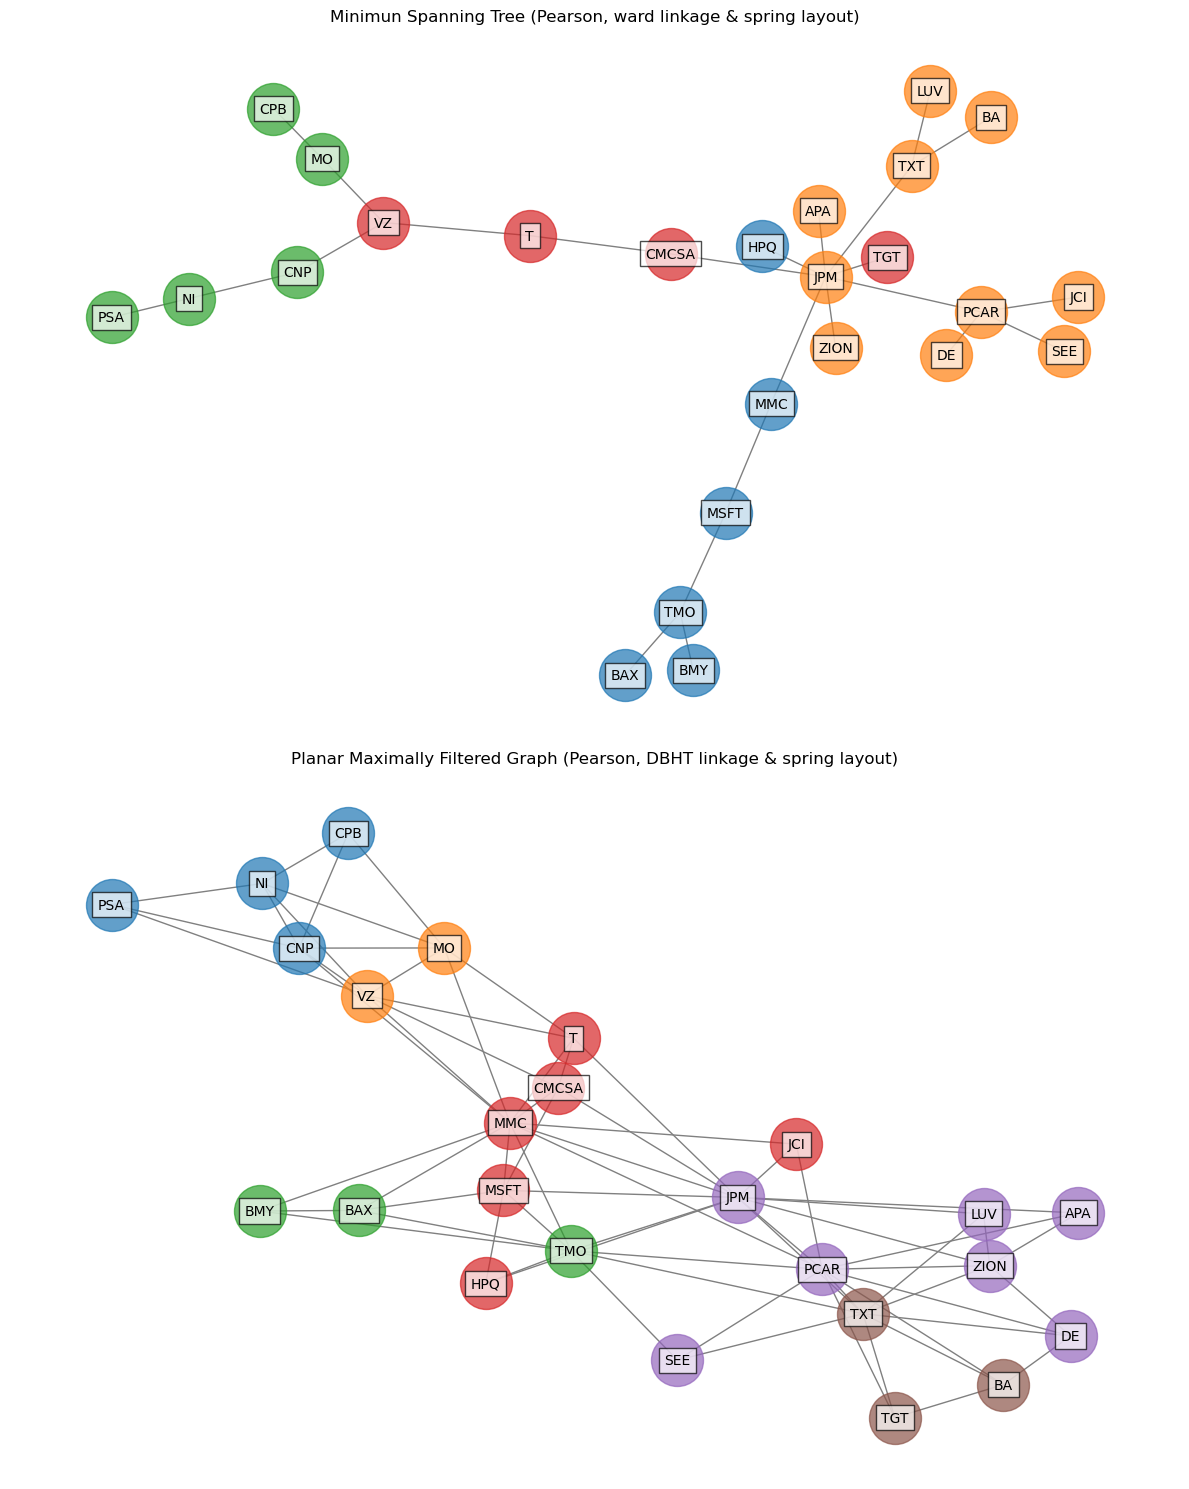

In [4]:
# Comparison of two Network Graphs

linkages = ['ward','DBHT']

fig, ax = plt.subplots(len(linkages), 1, figsize=(12, 15))
ax = np.ravel(ax)

j = 0
for i in linkages:
    ax[j] = rp.plot_network(returns=Y,
                            codependence="pearson",
                            linkage=i,
                            k=None,
                            max_k=10,
                            leaf_order=True,
                            kind='spring',
                            seed=0,
                            ax=ax[j])
    j += 1
    
plt.plot()

## 4. Comparing Networks Layouts 

Sometimes it is better to plot a network using a specific layout. Changing the network layout could help us to visualize better the relationship among assets and to identify a better clustering method. Riskfolio-Lib offers four network layouts.

[]

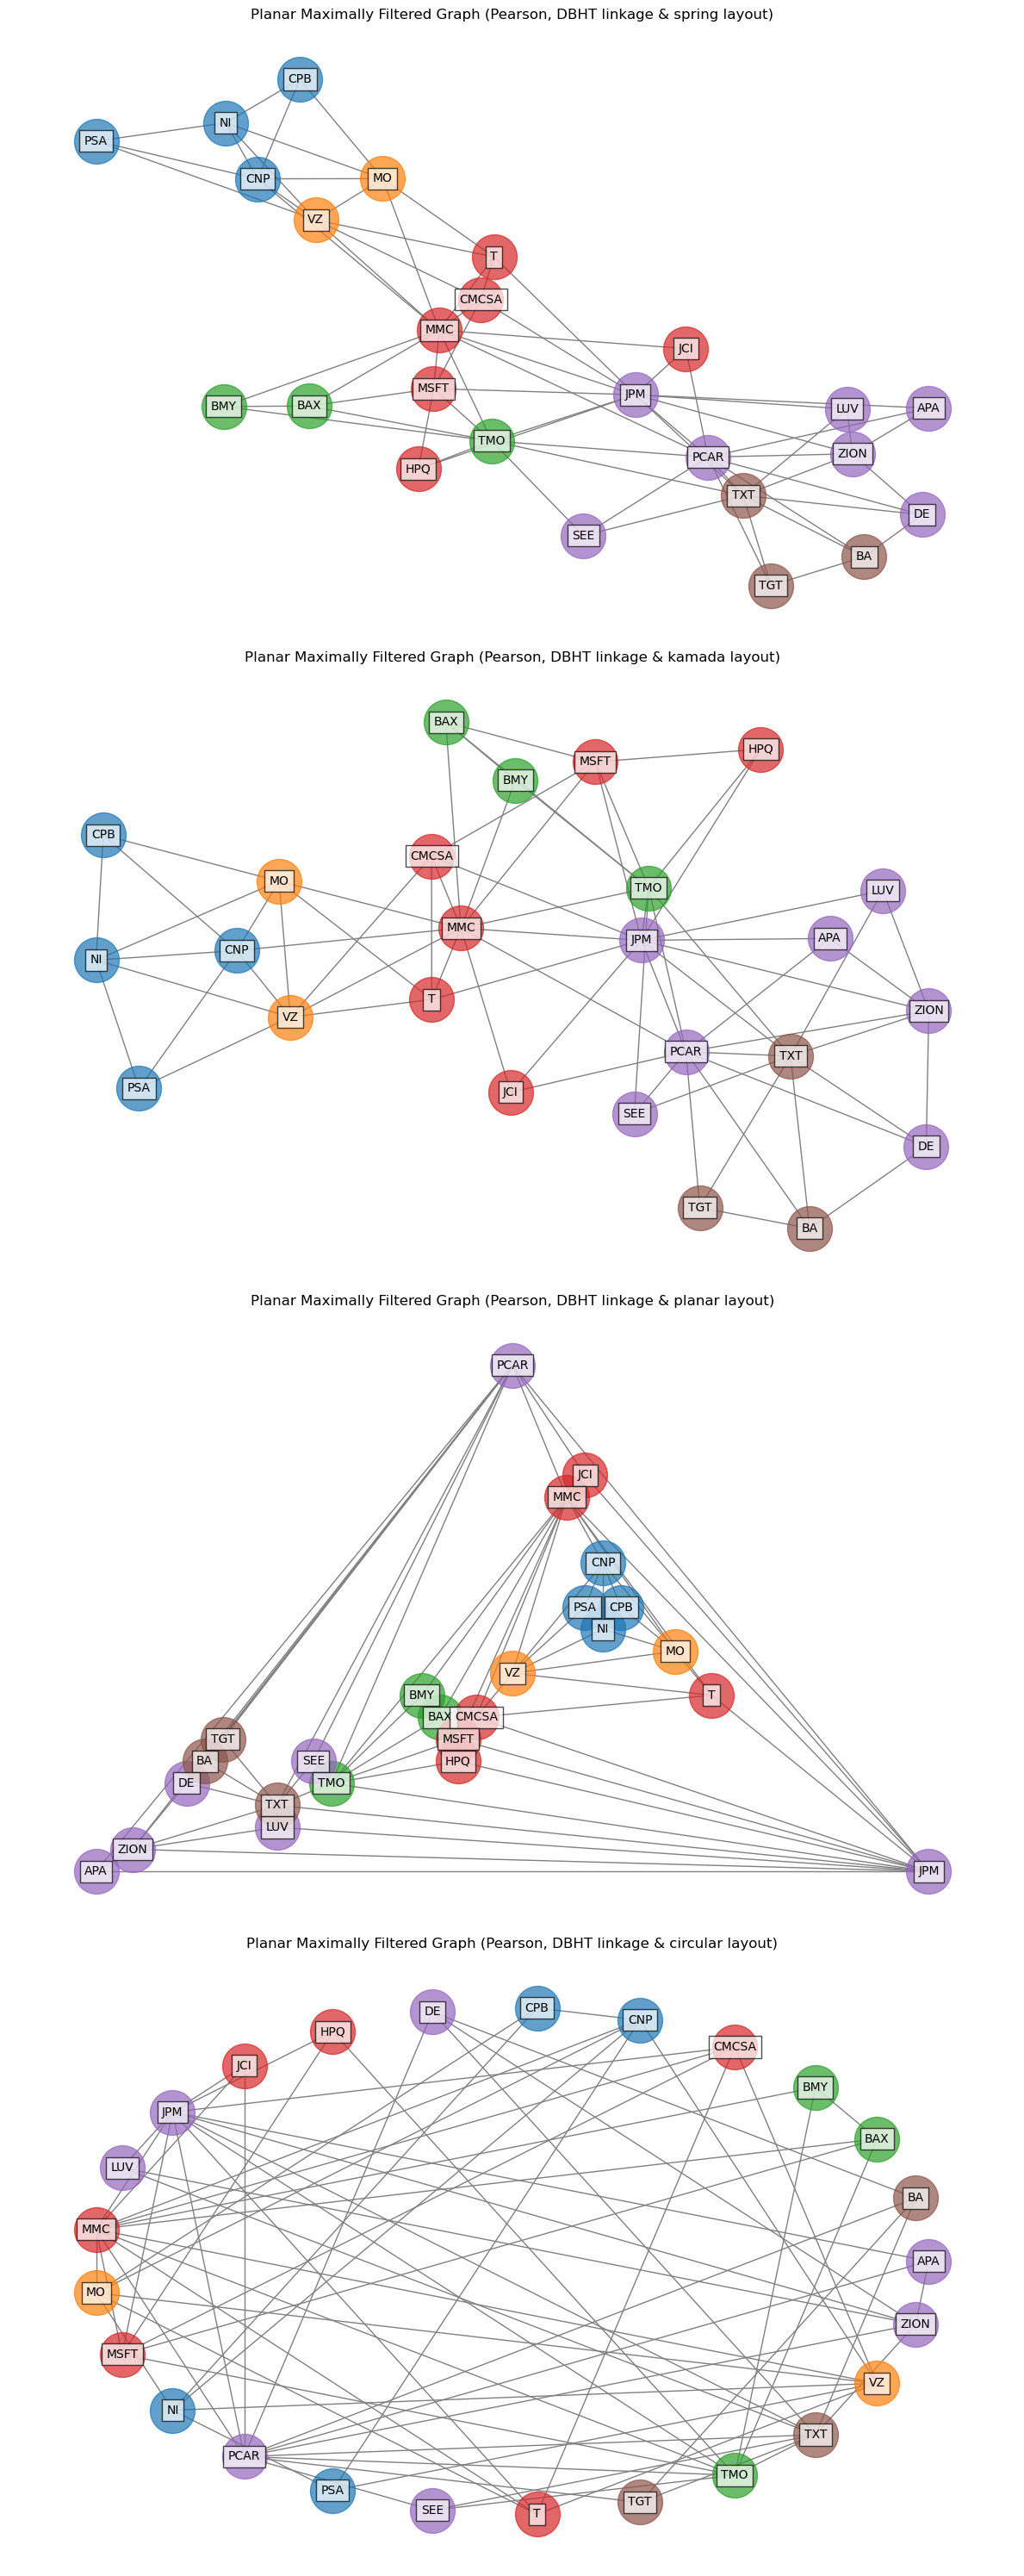

In [5]:
# Comparison of several network layouts

kinds =['spring','kamada','planar','circular']

fig, ax = plt.subplots(len(kinds), 1, figsize=(12, 30))
ax = np.ravel(ax)

j = 0
for i in kinds:
    ax[j] = rp.plot_network(returns=Y,
                            codependence="pearson",
                            linkage="DBHT",
                            k=None,
                            max_k=10,
                            leaf_order=True,
                            kind=i,
                            seed=0,
                            ax=ax[j])
    j += 1
    
plt.plot()

## 5. Clusters Components

In [6]:
# Getting components of each cluster

clusters = rp.assets_clusters(returns=Y,
                              codependence='pearson',
                              linkage='DBHT',
                              k=None,
                              max_k=10,
                              leaf_order=True)

display(clusters.sort_values(by='Clusters'))

,Assets,Clusters
5,CNP,Cluster 1
6,CPB,Cluster 1
17,PSA,Cluster 1
15,NI,Cluster 1
23,VZ,Cluster 2
13,MO,Cluster 2
21,TMO,Cluster 3
2,BAX,Cluster 3
3,BMY,Cluster 3
12,MMC,Cluster 4
